In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brasilian-houses-to-rent/houses_to_rent.csv
/kaggle/input/brasilian-houses-to-rent/houses_to_rent_v2.csv


In [2]:
# Carregando os dados
df = pd.read_csv('/kaggle/input/brasilian-houses-to-rent/houses_to_rent_v2.csv')

df.shape

(10692, 13)

In [3]:
# Verificando os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [4]:
# Olhando os dados
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
# Olhando a coluna city
df['city'].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

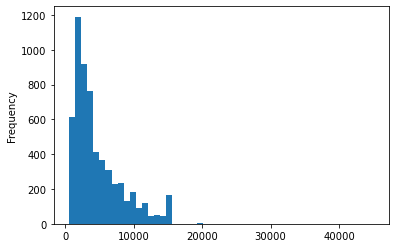

In [6]:
# Verificando a distribuição do valor do aluguel por cidade
df[df['city'] == 'São Paulo']['rent amount (R$)'].plot.hist(bins=50)

In [7]:
# Verificando os 10 maiores valores de aluguel em São Paulo
df[df['city'] == 'São Paulo'].nlargest(10, 'rent amount (R$)')

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2182,São Paulo,700,4,7,8,-,acept,not furnished,0,45000,8750,677,54430
7748,São Paulo,350,3,3,3,-,acept,not furnished,0,30000,560,451,31010
6947,São Paulo,486,8,4,6,-,acept,not furnished,0,25000,2200,376,27580
2619,São Paulo,80,2,1,1,1,acept,not furnished,875,24000,0,305,25180
157,São Paulo,660,4,5,5,12,acept,furnished,4800,20000,1750,254,26800
1253,São Paulo,315,3,5,2,14,not acept,not furnished,4300,20000,959,254,25510
1743,São Paulo,410,4,5,5,1,acept,not furnished,0,20000,0,254,20250
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
5525,São Paulo,900,3,4,8,-,acept,not furnished,0,20000,3813,301,24110
6185,São Paulo,455,4,5,4,5,acept,not furnished,8500,19500,3334,248,31580


In [8]:
# Verificando os 10 maiores valores de aluguel em Porto Alegre
df[df['city'] == 'Porto Alegre'].nlargest(10, 'rent amount (R$)')

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2521,Porto Alegre,318,4,3,0,-,acept,not furnished,0,19000,384,338,19720
816,Porto Alegre,367,3,4,4,8,not acept,not furnished,7000,15000,1032,220,23250
1893,Porto Alegre,540,6,8,3,-,acept,not furnished,0,15000,467,267,15730
2495,Porto Alegre,563,3,6,4,12,acept,not furnished,5200,15000,1250,220,21670
2901,Porto Alegre,425,4,4,0,-,acept,not furnished,0,15000,750,267,16020
6726,Porto Alegre,200,4,3,0,-,not acept,not furnished,0,15000,834,267,16100
10416,Porto Alegre,350,3,3,3,-,acept,not furnished,0,15000,667,267,15930
7605,Porto Alegre,233,4,6,4,-,acept,not furnished,0,14000,584,249,14830
8327,Porto Alegre,339,3,5,4,11,acept,furnished,3000,14000,834,205,18040
7169,Porto Alegre,650,4,6,5,-,acept,furnished,0,13800,650,246,14700


In [9]:
# Verificando os 10 maiores valores de aluguel em Belo Horizonte
df[df['city'] == 'Belo Horizonte'].nlargest(10, 'rent amount (R$)')

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
369,Belo Horizonte,200,2,4,3,12,acept,not furnished,1897,15000,827,200,17920
408,Belo Horizonte,362,4,5,0,19,not acept,not furnished,4138,15000,1975,200,21310
534,Belo Horizonte,548,4,7,6,17,acept,not furnished,5905,15000,2484,200,23590
571,Belo Horizonte,220,4,3,0,9,acept,furnished,3000,15000,1138,200,19340
1099,Belo Horizonte,350,5,4,4,-,acept,not furnished,0,15000,1320,246,16570
1332,Belo Horizonte,200,4,3,0,-,acept,not furnished,0,15000,36,246,15280
1452,Belo Horizonte,500,7,6,3,-,acept,not furnished,0,15000,384,246,15630
1580,Belo Horizonte,312,4,5,4,15,acept,not furnished,3150,15000,1747,200,20100
1625,Belo Horizonte,260,4,5,4,5,acept,not furnished,2405,15000,153,200,17760
1719,Belo Horizonte,230,4,3,4,7,acept,furnished,3100,15000,1500,200,19800


In [10]:
# Distribuição dos dados sobre quartos
df['rooms'].value_counts()

3     3269
2     2975
1     2454
4     1586
5      288
6       68
7       36
8       11
10       3
13       1
9        1
Name: rooms, dtype: int64

In [11]:
# Distribuição dos dados sobre banheiros
df['bathroom'].value_counts()

1     4301
2     2910
3     1474
4     1111
5      578
6      215
7       85
8       11
9        4
10       3
Name: bathroom, dtype: int64

In [12]:
# Distribuição dos dados sobre garagem
df['parking spaces'].value_counts()

1     3630
0     2683
2     2070
3      968
4      789
5      230
6      163
8      123
7       33
10       2
12       1
Name: parking spaces, dtype: int64

In [13]:
# Verificando o imovel com 13 quartos
df[df['rooms'] == 13]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
7835,Rio de Janeiro,439,13,4,3,-,acept,not furnished,0,15000,667,229,15900


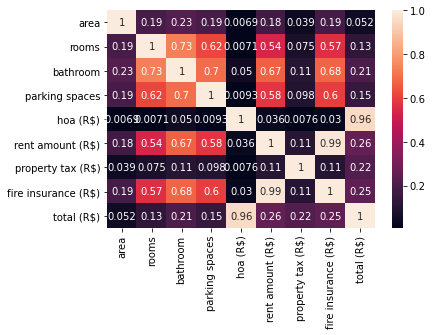

In [14]:
# Olhando a correlação das variáveis
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [15]:
# Tratamento de dados

# Convertendo a coluna floor
df[df['floor'] == '-'] = '0'
df['floor'] = df['floor'].astype(int)

# Convertendo as colunas categóricas
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   city                 10692 non-null  int8 
 1   area                 10692 non-null  int16
 2   rooms                10692 non-null  int8 
 3   bathroom             10692 non-null  int8 
 4   parking spaces       10692 non-null  int8 
 5   floor                10692 non-null  int64
 6   animal               10692 non-null  int8 
 7   furniture            10692 non-null  int8 
 8   hoa (R$)             10692 non-null  int16
 9   rent amount (R$)     10692 non-null  int16
 10  property tax (R$)    10692 non-null  int16
 11  fire insurance (R$)  10692 non-null  int16
 12  total (R$)           10692 non-null  int16
dtypes: int16(6), int64(1), int8(6)
memory usage: 271.6 KB


In [17]:
# Importando as bibliotecas
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [18]:
# Divisão dos dados
train, test = train_test_split(df)

train.shape, test.shape

((8019, 13), (2673, 13))

In [19]:
# Usando Random Forest
# Sem remover a coluna Rent Amount

# Features
feats = [col for col in df.columns if col not in ['total (R$)']]

# Instanciar o modelo
rf1 = RandomForestRegressor(random_state=42, n_estimators=200, oob_score=True)

# Treinar o modelo
rf1.fit(train[feats], train['total (R$)'])

# Previsões usando o modelo
preds1 = rf1.predict(test[feats])

# Avaliar o desempenho
mean_squared_error(test['total (R$)'], preds1)

2264.388046558175

In [20]:
# Usando Random Forest
# Removendo a coluna Rent Amount

# Features
feats = [col for col in df.columns if col not in ['rent amount (R$)', 'total (R$)']]

# Instanciar o modelo
rf2 = RandomForestRegressor(random_state=42, n_estimators=200, oob_score=True)

# Treinar o modelo
rf2.fit(train[feats], train['total (R$)'])

# Previsões usando o modelo
preds2 = rf2.predict(test[feats])

# Avaliar o desempenho
mean_squared_error(test['total (R$)'], preds2)

11986.761581902389

In [21]:
# Atividade para 17/09/2020

# - Melhorar tratamento dos dados
# - Possibilidade de feature engineering
# - Utilização de outros algoritimos
# - OBJETIVO: Melhorar o desempenho da previsão